In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_excel('Assignment-1 Data Set.xls')
df.head()

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
0,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
1,Basic 4,G,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
2,Cheerios,G,C,110,6,2,290,2.0,17.0,1,1,105,25,1.00,1.25
3,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,2,45,25,1.00,0.75
4,Clusters,G,C,110,3,2,140,2.0,13.0,7,3,105,25,1.00,0.50


In [55]:
print("Total unique cereal # {} \n Total unique manifacturer # {}".format(len(df['Cereal'].unique()),
                                                                         len(df['Manufacturer'].unique())))

Total unique cereal # 77 
 Total unique manifacturer # 7


In [56]:
df.columns

Index(['Cereal', 'Manufacturer', 'Type', 'Calories', 'Protein', 'Fat',
       'Sodium', 'Fiber', 'Carbohydrates', 'Sugars', 'Shelf', 'Potassium',
       'Vitamins', 'Weight', 'Cups'],
      dtype='object')

In [57]:
df = df.set_index("Cereal")
df.head()

,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
Cereal,,,,,,,,,,,,,,
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
Basic 4,G,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
Cheerios,G,C,110,6,2,290,2.0,17.0,1,1,105,25,1.00,1.25
Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,2,45,25,1.00,0.75
Clusters,G,C,110,3,2,140,2.0,13.0,7,3,105,25,1.00,0.50


### In type, H stand for Hot  and C stands for Cold

In [58]:
df['Type']=df['Type'].replace(['C','H'],[1,0])
df.head()

,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
Cereal,,,,,,,,,,,,,,
Apple Cinnamon Cheerios,G,1,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
Basic 4,G,1,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
Cheerios,G,1,110,6,2,290,2.0,17.0,1,1,105,25,1.00,1.25
Cinnamon Toast Crunch,G,1,120,1,3,210,0.0,13.0,9,2,45,25,1.00,0.75
Clusters,G,1,110,3,2,140,2.0,13.0,7,3,105,25,1.00,0.50


c:\users\kk\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Calories', ylabel='Count'>

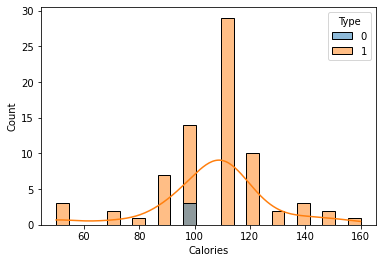

In [59]:
#df['Type'].plot(kind='hist', hue='Calories')
sns.histplot(data=df,x='Calories',hue='Type',kde=True)

<AxesSubplot:xlabel='Calories', ylabel='Count'>

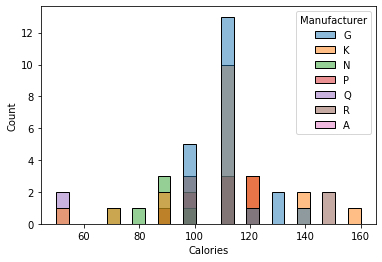

In [62]:

sns.histplot(data=df,x='Calories',hue='Manufacturer')

<AxesSubplot:xlabel='Type', ylabel='Calories'>

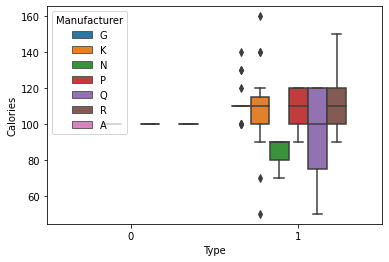

In [70]:

sns.boxplot(data=df,y='Calories',x='Type',hue='Manufacturer')


## Considering Cold value based data
### Assuming
#### Considering 3 main elements for growth 
##### Calories
##### Protien
##### Carbohydrates
##### Less Sugar

# Less Sugar

<AxesSubplot:xlabel='Manufacturer', ylabel='Calories'>

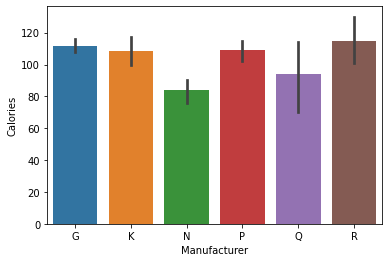

In [89]:
#calculating Calories per Manufacturer
sns.barplot(x=df['Manufacturer'],y=df['Calories'])

In [144]:
df = df.sort_values(by='Sugars')
print('Sugars Mean is {}'.format(df['Sugars'].unique()[df['Sugars'].unique().sum()//df['Sugars'].unique().shape][0]))

print('Sugars Median is {}'.format(df['Sugars'].unique()[len(df['Sugars'].unique())//2]))

Sugars Mean is 7
Sugars Median is 8


### Creating range of sugards 
#### if  sugar < 5 ==0 
#### if sugar >=5 and <=8 1
#### if sugar >8 == 2 

In [154]:
df['Sugars']=df['Sugars'].mask(df['Sugars']<5,0)
df['Sugars']=df['Sugars'].mask((df['Sugars']>=5) & (df['Sugars']<=8),1)

df['Sugars']=df['Sugars'].mask(df['Sugars']>8,2)

In [158]:
df['Sugars'].value_counts()

2    30
0    23
1    21
Name: Sugars, dtype: int64

<AxesSubplot:xlabel='Manufacturer', ylabel='Sugars'>

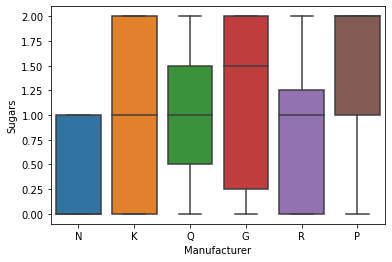

In [163]:
sns.boxplot(x=df['Manufacturer'],y=df['Sugars'])
#this shows how much an average a amouunt of sugar a company is provided in their cereals

# Calories

count     74.000000
mean     107.162162
std       19.829428
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: Calories, dtype: float64


<AxesSubplot:>

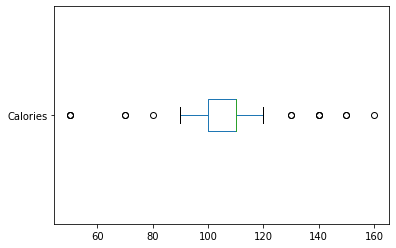

In [169]:
#While individual functions for mean, median, max, ect. do exist, this is an easy way to get it all at once.
print(df['Calories'].describe())
df['Calories'].plot.box(vert=False)

# Carbohyderates

In [171]:
df.groupby('Manufacturer').describe()

Type                                    Calories              \
             count mean  std  min  25%  50%  75%  max    count        mean   
Manufacturer                                                                 
G             22.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     22.0  111.363636   
K             23.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     23.0  108.695652   
N              5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      5.0   84.000000   
P              9.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      9.0  108.888889   
Q              7.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      7.0   94.285714   
R              8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      8.0  115.000000   

              ... Weight        Cups                                           \
              ...    75%   max count      mean       std   min     25%    50%   
Manufacturer  ...                                                               
G             ...    1.0  1.50  22.0  0.875000  0.240906  0.50  0.7500  0.875   
K             ...    1.0  1.50  23.0  0.622174  0.549429 -1.00  0.5850  0.750   
N             ...    1.0  1.00   5.0 -0.066000  0.863846 -1.00 -1.0000  0.330   
P             ...    1.0  1.33   9.0  0.714444  0.317101  0.25  0.6700  0.670   
Q             ...    1.0  1.00   7.0  0.274286  0.888329 -1.00 -0.2500  0.670   
R             ...    1.0  1.00   8.0  0.371250  0.861650 -1.00  0.2525  0.710   

                            
                 75%   max  
Manufacturer                
G             1.0000  1.50  
K             1.0000  1.00  
N             0.6700  0.67  
P             0.8800  1.33  
Q             0.8750  1.00  
R             0.8125  1.13  

[6 rows x 104 columns]

In [172]:
df.groupby('Manufacturer').describe()['Calories']


,count,mean,std,min,25%,50%,75%,max
Manufacturer,,,,,,,,
G,22.0,111.363636,10.371873,100.0,110.0,110.0,110.0,140.0
K,23.0,108.695652,22.218818,50.0,100.0,110.0,115.0,160.0
N,5.0,84.000000,8.944272,70.0,80.0,90.0,90.0,90.0
P,9.0,108.888889,10.540926,90.0,100.0,110.0,120.0,120.0
Q,7.0,94.285714,31.547394,50.0,75.0,100.0,120.0,120.0
R,8.0,115.000000,22.677868,90.0,100.0,110.0,120.0,150.0


the manufacturer R consists of higher calories 

In [176]:
df.groupby('Manufacturer').describe()['Carbohydrates']

,count,mean,std,min,25%,50%,75%,max
Manufacturer,,,,,,,,
G,22.0,14.727273,3.347804,10.5,12.00,14.25,16.75,21.0
K,23.0,15.130435,4.465060,7.0,12.00,15.00,19.00,22.0
N,5.0,15.000000,5.958188,5.0,15.00,16.00,19.00,20.0
P,9.0,13.222222,1.922094,11.0,12.00,13.00,14.00,17.0
Q,7.0,11.571429,1.988060,8.0,11.00,12.00,12.50,14.0
R,8.0,17.625000,3.248626,14.0,15.75,16.50,19.00,23.0


Again the manufacturer R consists of higher Carbohydrates 